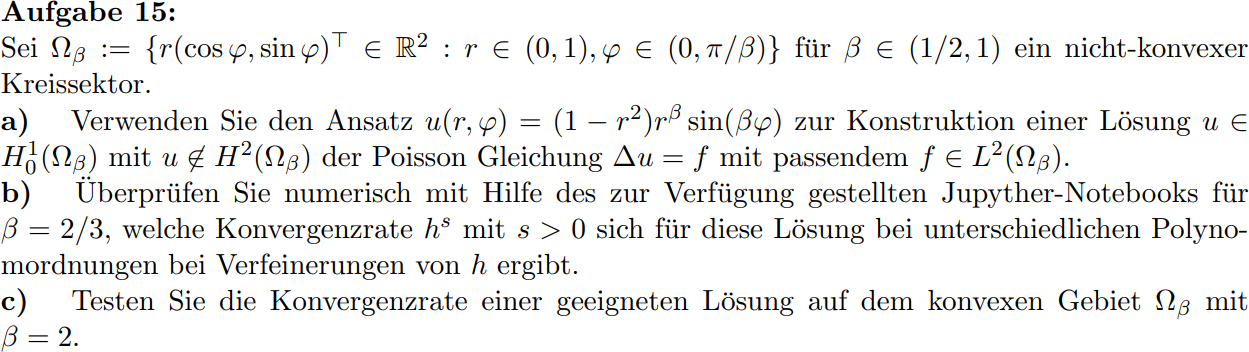

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import ngsolve as ngs
# from ngsolve import *

from ngsolve.webgui import Draw
from netgen.geom2d  import SplineGeometry

from math import pi

In [2]:
r, phi, beta = sp.symbols('r varphi beta')

u = (1 - r ** 2) * r ** beta * sp.sin(beta * phi)
display(u)

Du = sp.Matrix([
    u.diff(r)  .simplify(),
    u.diff(phi).simplify()
])
display(Du)

DDu = sp.Matrix([
    [
        u.diff(r)  .diff(r).simplify(),
        u.diff(phi).diff(r).simplify()
    ],
    [
        u.diff(r)  .diff(phi).simplify(),
        u.diff(phi).diff(phi).simplify()
    ]
])
display(DDu)

laplace_u = sp.simplify(
    u.diff(r, 2) + 1/r * u.diff(r) + 1/r ** 2 * u.diff(phi, 2)
)
display(laplace_u)

r**beta*(1 - r**2)*sin(beta*varphi)

Matrix([
[-r**(beta - 1)*(beta*r**2 - beta + 2*r**2)*sin(beta*varphi)],
[                   beta*r**beta*(1 - r**2)*cos(beta*varphi)]])

Matrix([
[-r**(beta - 2)*(beta**2*r**2 - beta**2 + 3*beta*r**2 + beta + 2*r**2)*sin(beta*varphi), -beta*r**(beta - 1)*(beta*r**2 - beta + 2*r**2)*cos(beta*varphi)],
[                      -beta*r**(beta - 1)*(beta*r**2 - beta + 2*r**2)*cos(beta*varphi),                      beta**2*r**beta*(r**2 - 1)*sin(beta*varphi)]])

-4*r**beta*(beta + 1)*sin(beta*varphi)

We thus define our solution and right hand side as follows.

$\begin{align*}
    u(r, \varphi) & := (1 - r^2) r^\beta \sin(\beta \varphi) \\
    f(r, \varphi) & := -\Delta u(r, \varphi) = (4 \beta + 4) r^\beta \sin(\varphi \beta)
\end{align*}$

$\begin{align*}
    r & = \sqrt{x^2 + y^2} \\
    \varphi
    & =
    \arctan_2(x, y)
    =
    \begin{cases}
        \arctan \frac{y}{x}         & \text{für}~ x > 0 \\
        (\arctan \frac{y}{x}) + \pi & \text{für}~ x < 0, y > 0 \\
        \pm \pi                     & \text{für}~ x < 0, y = 0 \\
        (\arctan \frac{y}{x}) - \pi & \text{für}~ x < 0, y < 0 \\
        + \frac{\pi}{2}             & \text{für}~ x = 0, y > 0 \\
        - \frac{\pi}{2}             & \text{für}~ x = 0, y < 0
    \end{cases}
\end{align*}$

order = 2
h = 1
fes.ndof = 18
order = 2
h = 0.5
fes.ndof = 18
order = 2
h = 0.25
fes.ndof = 59
order = 2
h = 0.125
fes.ndof = 232


NGSWebGuiWidget(value={'ngsolve_version': '6.2.2008', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'draw_vol': F…

order = 2
h = 0.0625
fes.ndof = 960
order = 2
h = 0.03125
fes.ndof = 3851
order = 2
h = 0.015625
fes.ndof = 15344
order = 3
h = 1
fes.ndof = 34
order = 3
h = 0.5
fes.ndof = 34
order = 3
h = 0.25
fes.ndof = 121
order = 3
h = 0.125
fes.ndof = 499


NGSWebGuiWidget(value={'ngsolve_version': '6.2.2008', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'draw_vol': F…

order = 3
h = 0.0625
fes.ndof = 2116
order = 3
h = 0.03125
fes.ndof = 8578
order = 3
h = 0.015625
fes.ndof = 34351
order = 4
h = 1
fes.ndof = 55
order = 4
h = 0.5
fes.ndof = 55
order = 4
h = 0.25
fes.ndof = 205
order = 4
h = 0.125
fes.ndof = 867


NGSWebGuiWidget(value={'ngsolve_version': '6.2.2008', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'draw_vol': F…

order = 4
h = 0.0625
fes.ndof = 3723
order = 4
h = 0.03125
fes.ndof = 15173
order = 4
h = 0.015625
fes.ndof = 60915


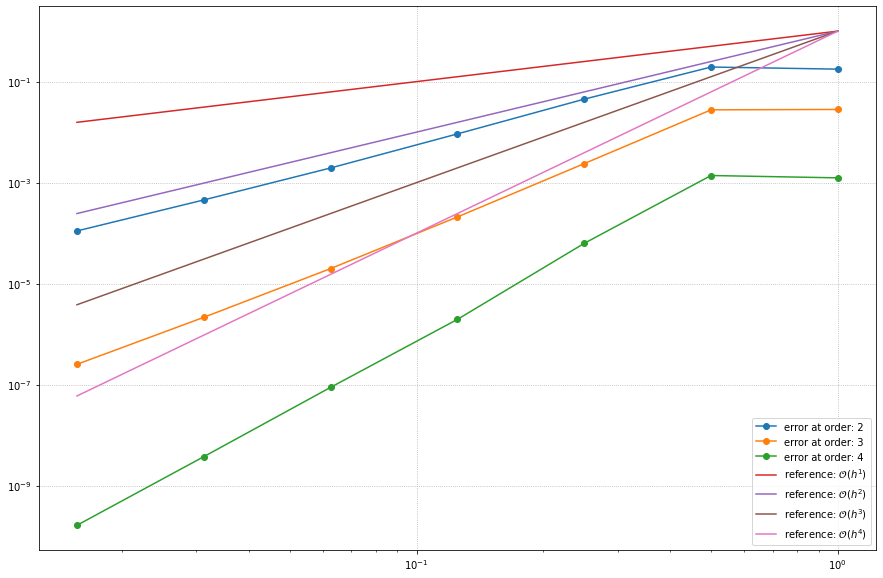

In [18]:
beta = 2
R = 1

r = ngs.sqrt(ngs.x ** 2 + ngs.y ** 2)
phi = pi / 2 - ngs.IfPos(-ngs.y, ngs.IfPos(-ngs.x, ngs.atan2(ngs.x, ngs.y), ngs.IfPos(ngs.x, ngs.atan2(ngs.x, ngs.y), -pi)), ngs.atan2(ngs.x, ngs.y))

ex_sol = (R ** 2 - r ** 2) * r ** beta * ngs.sin(phi * beta)
rhs = (4 * beta + 4) * r ** beta * ngs.sin(phi * beta)

ex_sol_grad = ngs.CoefficientFunction(
    (
        ex_sol.Diff(ngs.x),
        ex_sol.Diff(ngs.y)
    )
)

eps = 1e-8
r_eps = ngs.sqrt(
    (ngs.x + eps) ** 2 + (ngs.y + eps) ** 2
)

grad_eps = ((R**2-r_eps**2)*beta*r_eps**(beta-1)*ngs.sin(phi*beta)-2*r_eps**(beta+1)*ngs.sin(phi*beta))*ngs.CoefficientFunction( (ngs.cos(phi),ngs.sin(phi)) ) + beta*(R**2-r_eps**2)*r_eps**(beta-1)*ngs.cos(phi*beta)*ngs.CoefficientFunction( (-ngs.sin(phi),ngs.cos(phi)) )
sol_grad = ngs.IfPos(r, ex_sol_grad, grad_eps)

geo = SplineGeometry()
# pnts = [(0, 0), (R, 0), (R, R), (0, R), (-R, R), (-R, 0), (-R, -R), (0, -R)]
pnts = [(0, 0), (R, 0), (R, R), (0, R)]
pind = [geo.AppendPoint(*pnt) for pnt in pnts]

# line from pind[0] to pind[1]
geo.Append(['line', pind[0], pind[1]], bc = "outer")

# spline from point pind[1] to pind[3] with control point pind[2]
geo.Append(['spline3', pind[1], pind[2], pind[3]], bc = "outer")

# # spline from point pind[3] to pind[5] with control point pind[4]
# geo.Append(['spline3', pind[3], pind[4], pind[5]], bc = "outer")

# # spline from point pind[5] to pind[7] with control point pind[6]
# geo.Append(['spline3', pind[5], pind[6], pind[7]], bc = "outer")

# # line from pind[7] to pind[0]
# geo.Append(['line', pind[7], pind[0]], bc = "outer")

# line from pind[3] to pind[0]
geo.Append(['line', pind[3], pind[0]], bc = "outer")

# -------------------------------- #

h_array = [2 ** -n for n in range(7)]
order_array = [2, 3, 4]
# order_array = [1]

error_arrays = []

for order in order_array:
    
    error_array = []

    for h in h_array:

        mesh = ngs.Mesh(geo.GenerateMesh(maxh = h))
        mesh.Curve(order)

        fes = ngs.H1(mesh, order = order, dirichlet = "outer")
        sol = ngs.GridFunction(fes)

        u, v = fes.TnT()

        a = ngs.BilinearForm(fes, symmetric = True)
        a += ngs.grad(u) * ngs.grad(v) * ngs.dx
        a.Assemble()

        f = ngs.LinearForm(fes)
        f += rhs * v * ngs.dx
        f.Assemble()

        print('order =', order)
        print('h =', h)
        print('fes.ndof =', fes.ndof)
        sol.vec.data = a.mat.Inverse(freedofs = fes.FreeDofs()) * f.vec

        H1err = ngs.sqrt(
            ngs.Integrate(
                (ex_sol - sol) ** 2 + ngs.InnerProduct(
                    ex_sol_grad - ngs.Grad(sol),
                    ex_sol_grad - ngs.Grad(sol)
                ),
                mesh
            )
        )

        error_array.append(H1err)

        if h == 2 ** -3:
            Draw((ex_sol-sol)**2 + ngs.InnerProduct(sol_grad-ngs.Grad(sol),sol_grad-ngs.Grad(sol)), mesh)

    error_arrays.append(error_array)

h_array = np.array(h_array)
order_array = np.array(order_array)
error_arrays = np.array(error_arrays)

s_array = [1, 2, 3, 4]

fig = plt.figure(figsize = (15, 10))

for n, order in enumerate(order_array):
    plt.loglog(h_array, error_arrays[n], 'o-', label = f'error at order: {order}')

for s in s_array:
    plt.loglog(h_array, h_array ** s, label = 'reference: $' + r'\mathcal{O}(h^{{' + str(s) + r'}})$')

plt.legend()
plt.grid(linestyle = ':')
plt.show()

In [15]:
help(ngs.H1)

Help on class H1 in module ngsolve.comp:

class H1(FESpace)
 |  An H1-conforming finite element space.
 |  
 |  The H1 finite element space consists of continuous and
 |  element-wise polynomial functions. It uses a hierarchical (=modal)
 |  basis built from integrated Legendre polynomials on tensor-product elements,
 |  and Jaboci polynomials on simplicial elements. 
 |  
 |  Boundary values are well defined. The function can be used directly on the
 |  boundary, using the trace operator is optional.
 |  
 |  The H1 space supports variable order, which can be set individually for edges, 
 |  faces and cells. 
 |  
 |  Internal degrees of freedom are declared as local dofs and are eliminated 
 |  if static condensation is on.
 |  
 |  The wirebasket consists of all vertex dofs. Optionally, one can include the 
 |  first (the quadratic bubble) edge basis function, or all edge basis functions
 |  into the wirebasket.
 |  
 |   Keyword arguments can be:
 |  order: int = 1
 |    order of f